In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Задание 1.1
### Исследование поведения погрешности приближения функции
### $F(x) = \frac{\ln{(1+x^2)}}{x} $
### частичными суммами на отрезке [0.3, 0.9]

In [23]:
#Объявим функции
#Исходная функция
def f(x) :
    return (np.log(1+x**2))/x

#k-ый член Тейлора
def Taylor(x, k) :
    return ((-1)**k * x**(2*k+1))/(k+1)

#Сумма Тейлора
def SumT(x, n) :
    res = x * 0
    for i in range(n) :
        res = res + Taylor(x, i)
    return res

#Абсолютная погрешность
def absDelta(x, n) :
    return np.abs(F(x) - SumT(x, n))

#Относительная погрешность
def relDelta(x, n) :
    return AbsDelta(x, n)/np.abs(SumT(x, n))

In [24]:
a = 0.3
b = 0.9
c = (a + b) / 2
x_data = np.linspace(a,b,1000)

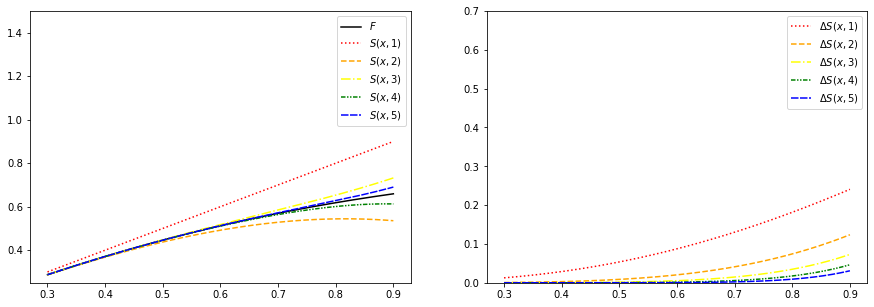

In [27]:
#Строим строим графички, ля ля ля ляяяяя
fig, axs = plt.subplots(1,2, figsize = (15, 5))

#Сперва черной сплошной линией нарисуем на первом графике функцю
axs[0].plot(x_data,f(x_data),label = '$F$',color = "black")

#Теперь зададим стили и цвета, чтобы наши графики хоть как то отличались
styles = ( 'dotted','dashed','dashdot',(0, (3, 1, 1, 1, 1, 1)), (0, (5, 1)), (0, (5, 10)))
colors = ( 'red', 'orange', 'yellow', 'green', 'blue')

#Рисуем сумму Тейлора с разным числом членов на 1 графике
axs[0].set_ylim([0.25,1.5])
for i in range(1,6) :
    axs[0].plot(x_data, sumT(x_data, i), label=f'$S(x,{i})$', ls = styles[i - 1], color = colors [i - 1])
axs[0].legend()

#Рисуем разницу суммы Тейлора и функции с разным числом членов на 2 графике
axs[1].set_ylim([0,0.7])
for i in range(1,6) :
    axs[1].plot(x_data, absDelta(x_data, i) , label=f'$\Delta S(x,{i})$', ls = styles[i - 1], color = colors [i - 1] )
axs[1].legend()

In [28]:
#Определяем количество членов ряда N, при котором величина относительной погрешности
# в средней точке отрезка станет меньше машинного эпсилон

machEps = 1
while 1 + machEps*0.5 != 1:
    machEps *= 0.5

momentSum = taylor(c, 2)
nextElem = taylor(c, 3)
N = 3
while np.abs(nextElem/momentSum) > machEps:
    momentSum += nextElem
    N += 1
    nextElem = taylor(c, N)

print(N)

36


[(0.0, 1e-14)]

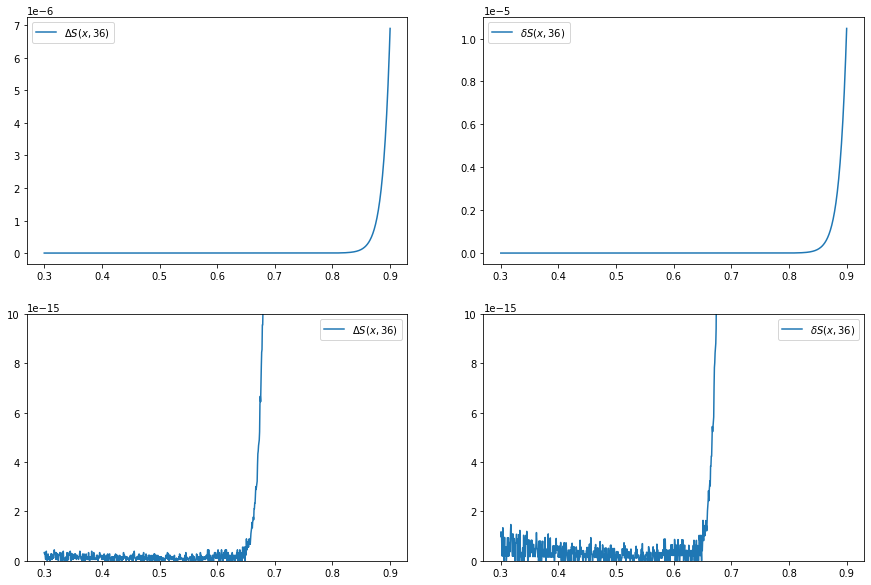

In [36]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0][0].plot(x_data, absDelta(x_data, N),label=f'$\Delta S(x,{N})$')
axs[0][0].legend()
axs[0][1].plot(x_data, relDelta(x_data,N), label=f'$\delta S(x,{N})$')
axs[0][1].legend()
axs[1][0].plot(x_data, absDelta(x_data, N),label=f'$\Delta S(x,{N})$')
axs[1][0].legend()
axs[1][1].plot(x_data, relDelta(x_data,N), label=f'$\delta S(x,{N})$')
axs[1][1].legend()

axs[1][0].set(ylim=(0.0, 10E-15))
axs[1][1].set(ylim=(0.0, 10E-15))

In [51]:
#Форматирование до 4 знаков после зпт
def ROUND(x):
    return np.float(np.format_float_scientific(x, precision = 4))

#Округление до N разрядов мантиссы одного элемента массива
def S_round_Item(x, N1):
    res = 0
    for i in range(N1):
        res += ROUND(taylor(x, i))
        res = ROUND(res)
    return res

#А теперь прогоним весь массив через наш округлятор(не уверен что такое слово есть в русско
def S_rounded(x, N1):
    res = x.copy()
    for i in range(len(x)):
        res[i] = S_round_Item(x[i], N1)
    return res

C:\Users\Gamer\AppData\Local\Temp/ipykernel_1304/1792706706.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.float(np.format_float_scientific(x, precision = 4))
C:\Users\Gamer\AppData\Local\Temp/ipykernel_1304/1792706706.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.float(np.format_float_scientific(x, precisio

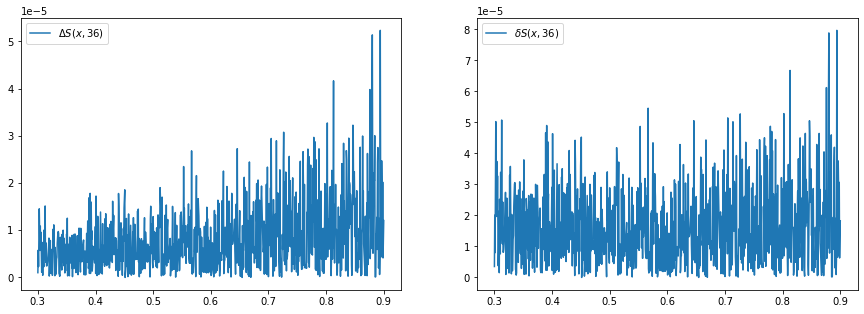

In [52]:
#Делаем рисунок из четырех графиков с округлением
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(x_data, np.abs(f(x_data) - sRnd(x_data, N)),label=f'$\Delta S(x,{N})$')
axs[0].legend()
axs[1].plot(x_data, np.abs((f(x_data) - sRnd(x_data, N))/sRnd(x_data, N)), label=f'$\delta S(x,{N})$')
axs[1].legend()
